In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
DATA_FOLDER = '/n/sd7/trung/csp/data/swbd'

In [2]:
with open(os.path.join(DATA_FOLDER, 'vocab/words_swda_full_old.txt')) as f:
    vocab = f.read().split('\n')
    
print("Vocab Size:", len(vocab))

Vocab Size: 27285


In [3]:
utts = []
with open(os.path.join(DATA_FOLDER, 'model_outputs', "swda_decoder_train.csv")) as f:
    for line in f.read().split('\n'):
        if line == '': continue
        utt = line.split('\t')[1]
        emb_path = "/n/sd7/trung/csp/" + line.split('\t')[2]
        #print(utt)
        utts.append((utt, emb_path))
print(len(utts))

200214


In [4]:
word_reprs = {}
for utt, emb_path in utts:
    for pos, id in enumerate(utt.split(' ')):
        if id == '': continue
        word = vocab[int(id)]
        if word not in word_reprs: word_reprs[word] = []
        word_reprs[word].append(dict(word=word, pos=pos, emb_path=emb_path))

all_words = list(word_reprs.keys())
all_words.sort(key=lambda word: len(word_reprs[word]), reverse=True)
print(all_words[:20])

['i', 'and', 'the', 'you', 'to', 'a', 'that', 'uh', 'of', 'it', 'know', 'yeah', 'in', 'uhhuh', 'they', 'have', 'but', 'so', "it's", 'is']


In [5]:
words = all_words[:5]
word_embs = []
for word in words:
    for w in word_reprs[word][:20]:
        word_embs.append((word, np.load(w['emb_path'])[w['pos']]))

print(len(word_embs))

100


In [6]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
values = tsne_model.fit_transform([emb for _, emb in word_embs])

x, y = zip(*values)
x = np.array(x)
y = np.array(y)

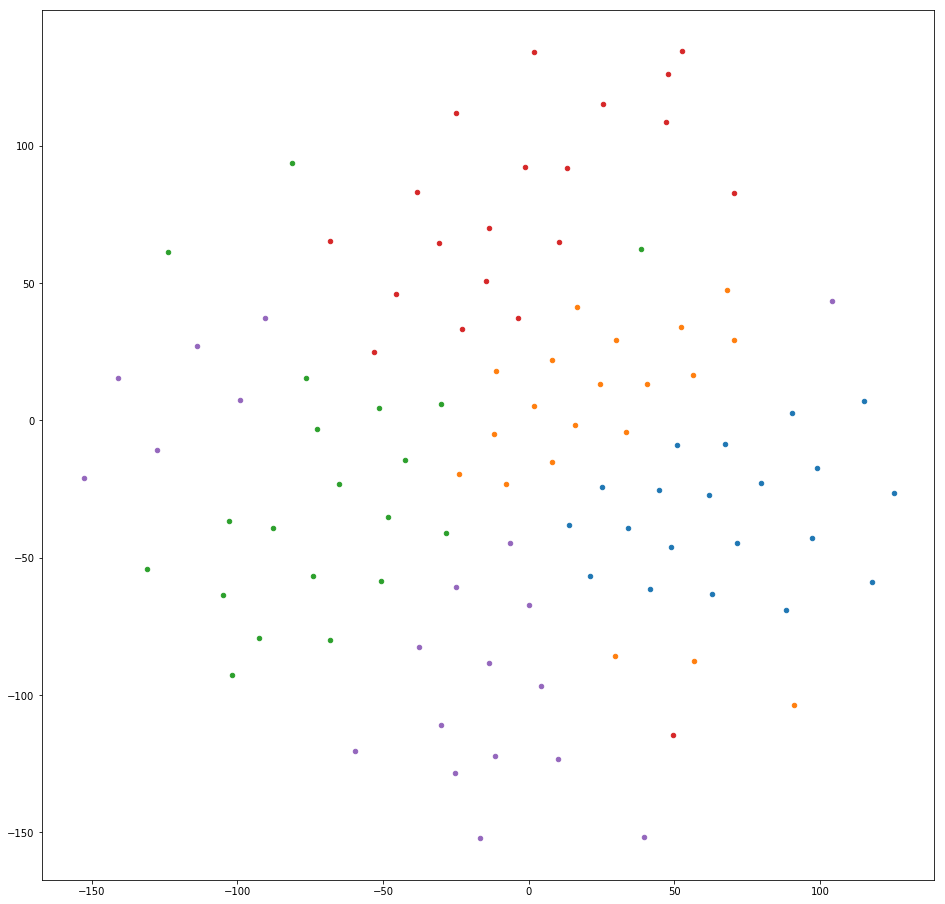

In [7]:
plt.figure(figsize=(16, 16))
for word in words:
    plt.scatter(
        x[[i for i, (w, _) in enumerate(word_embs) if w == word]],
        y[[i for i, (w, _) in enumerate(word_embs) if w == word]],
        s=20
    )

In [8]:
words = all_words[:500]
words = ["to", "too", "two", 
word_avg_embs = []
for word in words:
    embs = []
    for w in word_reprs[word][:20]:
        if w['pos'] >= np.shape(np.load(w['emb_path']))[0]:
            print(np.shape(np.load(w['emb_path']))[0])
        else:
            embs.append(np.load(w['emb_path'])[w['pos']])
    word_avg_embs.append(sum(embs) / len(embs))
print(len(word_avg_embs))

16
12
3
12
7
1
15
2
1
7
8
23
4
15
5
3
2
10
6
2
3
10
9
9
500


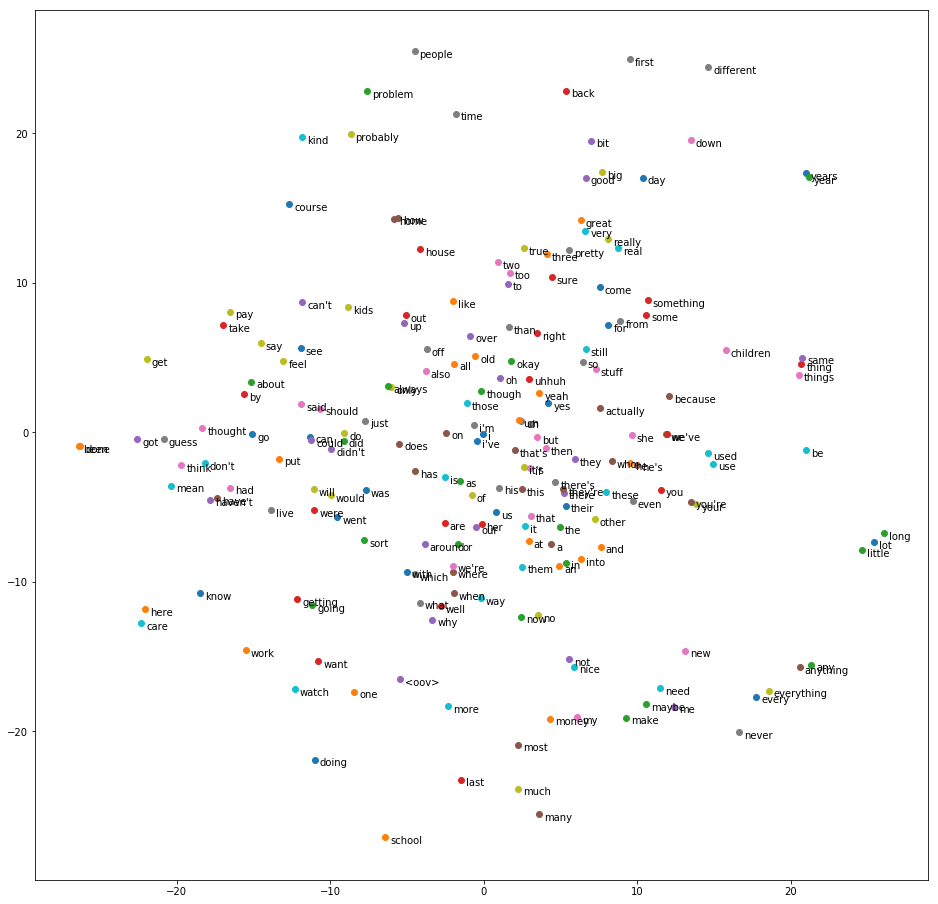

In [10]:
plt.figure(figsize=(16, 16))
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
values = tsne_model.fit_transform(word_avg_embs)
for i, (x, y) in enumerate(values[:200]):
    plt.scatter(x, y)
    plt.annotate(words[i], xy=(x, y), xytext=(5, 2), ha='left', va='top', textcoords='offset points')